# Прогноз использования оперативной памяти

На основе объема данных и сложности обработки строится модель линейной регрессии для предсказания объема использования оперативной памяти программой.

# Таблица исходных данных

| № | Объем данных (ГБ) | Сложность обработки (баллы) | Использование ОЗУ (ГБ) |
|:--:|:-----------------:|:---------------------------:|:-----------------------:|
| 1 | 5 | 3 | 8 |
| 2 | 10 | 4 | 16 |
| 3 | 7 | 5 | 12 |
| 4 | 12 | 2 | 20 |
| 5 | 15 | 6 | 24 |


# Решение

Построим модель линейной регрессии для прогноза использования ОЗУ. Модель имеет вид:
$$y = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2$$

где:
- $y$ — предсказанное использование ОЗУ (ГБ),
- $x_1$ — объем данных (ГБ),
- $x_2$ — сложность обработки (баллы).

Модель: y = 0.62 + 1.60 * Объем данных + -0.08 * Сложность обработки

Таблица компонентов модели:
                      Компонент  Значение
0             Смещение (beta_0)  0.621277
1         Объем данных (beta_1)  1.602837
2  Сложность обработки (beta_2) -0.082270


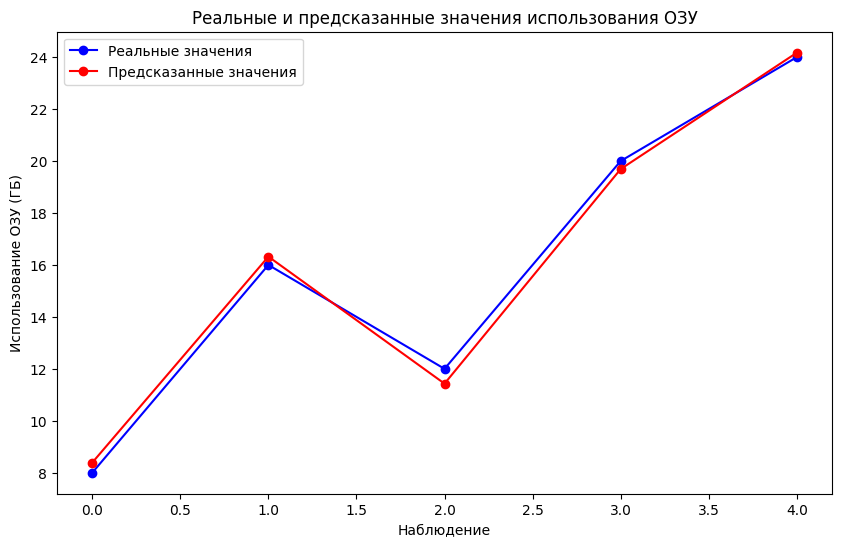

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Данные
data = {
    'Объем данных (ГБ)': [5, 10, 7, 12, 15],
    'Сложность обработки (баллы)': [3, 4, 5, 2, 6],
    'Использование ОЗУ (ГБ)': [8, 16, 12, 20, 24]
}

# Преобразуем данные в DataFrame
df = pd.DataFrame(data)

# Определяем входные параметры (X) и выход (y)
X = df[['Объем данных (ГБ)', 'Сложность обработки (баллы)']]
y = df['Использование ОЗУ (ГБ)']

# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Получаем коэффициенты модели
beta_0 = model.intercept_
beta_1, beta_2 = model.coef_

# Вывод формулы модели
print(f"Модель: y = {beta_0:.2f} + {beta_1:.2f} * Объем данных + {beta_2:.2f} * Сложность обработки")

# Таблица компонентов модели
coefficients = {
    'Компонент': ['Смещение (beta_0)', 'Объем данных (beta_1)', 'Сложность обработки (beta_2)'],
    'Значение': [beta_0, beta_1, beta_2]
}
coeff_df = pd.DataFrame(coefficients)
print("\nТаблица компонентов модели:")
print(coeff_df)

# Прогнозирование для обучающих данных
y_pred = model.predict(X)

# Визуализация реальных и предсказанных значений
plt.figure(figsize=(10, 6))
plt.plot(range(len(y)), y, 'bo-', label='Реальные значения')
plt.plot(range(len(y_pred)), y_pred, 'ro-', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Использование ОЗУ (ГБ)')
plt.title('Реальные и предсказанные значения использования ОЗУ')
plt.legend()
plt.show()

# Анализ результатов
Полученные коэффициенты позволяют интерпретировать влияние каждого параметра на прогнозируемое использование ОЗУ. Например:
- $\beta_0$ — базовое использование ОЗУ, когда оба параметра равны нулю.
- $\beta_1$ — изменение использования ОЗУ при увеличении объема данных на 1 ГБ.
- $\beta_2$ — изменение использования ОЗУ при увеличении сложности обработки на 1 балл.